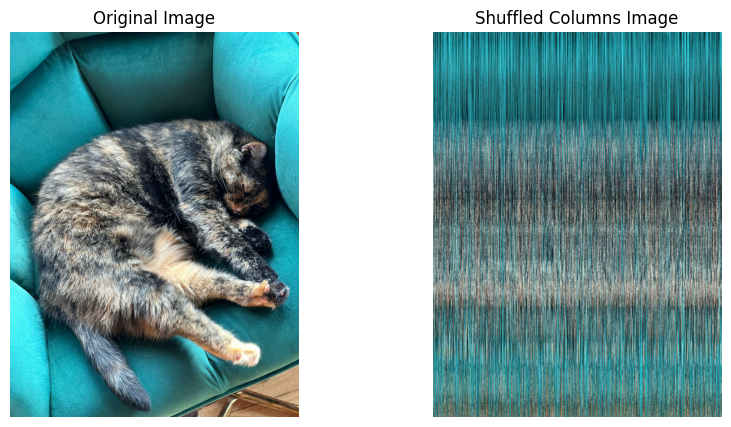

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Load the image into a pixel matrix
img = mpimg.imread('masha.jpg')  # Specify the path to your image

# Shuffle the columns
# Note: This shuffles the columns uniformly for all color channels if it's a color image
shuffled_img = img[:, np.random.permutation(img.shape[1]), :]

# Plot the original and shuffled images for comparison
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(shuffled_img)
ax[1].set_title('Shuffled Columns Image')
ax[1].axis('off')

plt.show()

In [3]:
import pandas as pd
import numpy as np

# Create a date range for 5 days
dates = pd.date_range('2024-01-01', periods=5)

# Generate random returns for 3 stocks over 5 days
# Assuming returns are in the range of -0.03 (a 3% loss) to 0.03 (a 3% gain) for daily returns
data = np.random.uniform(-0.03, 0.03, size=(5, 3))

# Create the DataFrame
df = pd.DataFrame(data, index=dates, columns=['Stock1', 'Stock2', 'Stock3'])

df


,Stock1,Stock2,Stock3
2024-01-01,-0.001353,0.014120,0.003198
2024-01-02,-0.001346,0.020830,-0.021771
2024-01-03,0.018512,-0.028073,0.002712
2024-01-04,0.028568,0.007888,0.007533
2024-01-05,0.007342,-0.027541,0.024717


In [6]:
df[['Stock3', 'Stock1', 'Stock2']]

,Stock3,Stock1,Stock2
2024-01-01,0.003198,-0.001353,0.014120
2024-01-02,-0.021771,-0.001346,0.020830
2024-01-03,0.002712,0.018512,-0.028073
2024-01-04,0.007533,0.028568,0.007888
2024-01-05,0.024717,0.007342,-0.027541


(50, 5)

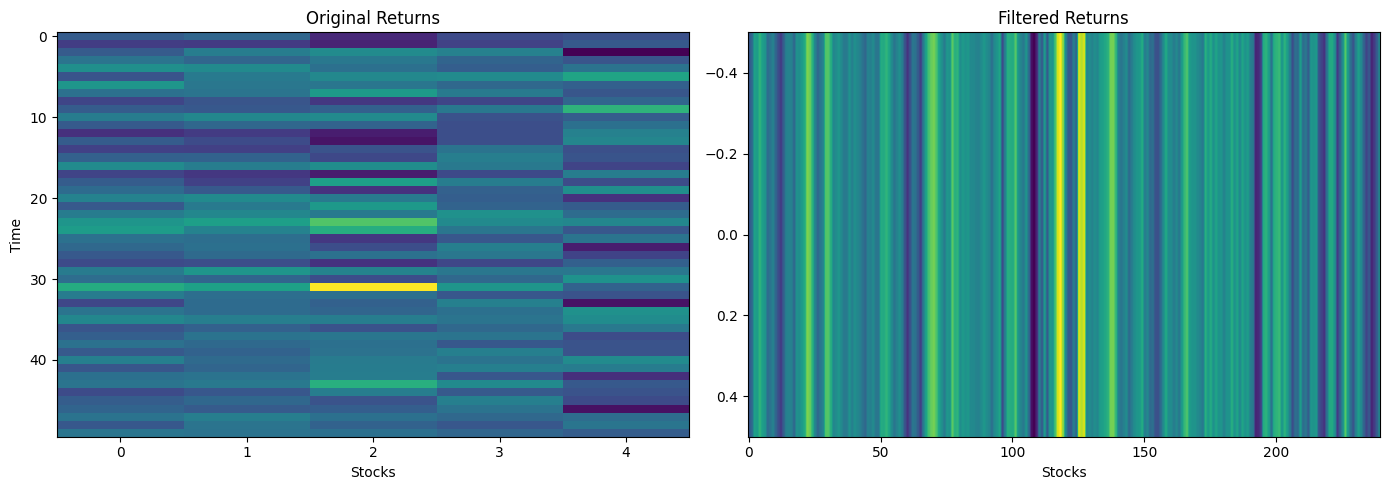

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# Simulate a (50,5) matrix of stock returns
np.random.seed(0)  # For reproducibility
returns = pd.read_csv('historical_returns.csv', index_col=0).to_numpy()#np.random.randn(50, 5)

# Define a (3,1) kernel for demonstration (e.g., a simple averaging filter)
kernel = np.array([[1], [1], [1]]) / 3

# Apply the kernel to each column of the returns matrix
# 'valid' mode means no padding is applied and the output size is reduced
filtered_returns = np.vstack([convolve2d(returns[:, i].reshape(-1, 1), kernel, mode='valid') for i in range(returns.shape[1])]).T

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot the original returns matrix
ax[0].imshow(returns, cmap='viridis', aspect='auto')
ax[0].set_title('Original Returns')
ax[0].set_xlabel('Stocks')
ax[0].set_ylabel('Time')

# Plot the kernel-applied returns matrix
ax[1].imshow(filtered_returns, cmap='viridis', aspect='auto')
ax[1].set_title('Filtered Returns')
ax[1].set_xlabel('Stocks')
# ax[1].set_ylabel('Time')  # Y-axis labels are similar

plt.tight_layout()
plt.show()


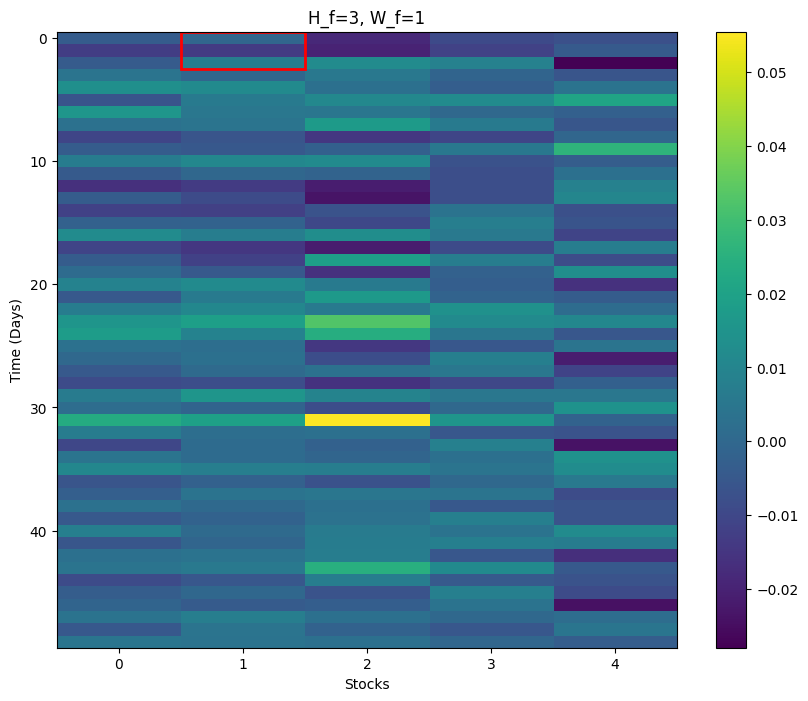

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Simulate a (50, 5) matrix of stock returns
np.random.seed(0)  # For reproducibility
returns = pd.read_csv('historical_returns.csv', index_col=0).to_numpy()#np.random.randn(50, 5)

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.imshow(returns, cmap='viridis', aspect='auto')

# Adding red squares to indicate the kernel's position
# Let's place some sample kernels at arbitrary positions
kernel_height, kernel_width = 3, 1
sample_positions = [(0, 1)]  # Sample (row, column) positions for the kernel

for pos in sample_positions:
    # Create a red rectangle at each position
    rect = patches.Rectangle((pos[1]-0.5, pos[0]-0.5), kernel_width, kernel_height, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

ax.set_title('H_f=3, W_f=1')
ax.set_xlabel('Stocks')
ax.set_ylabel('Time (Days)')
plt.colorbar(cax, ax=ax, orientation='vertical')
plt.show()


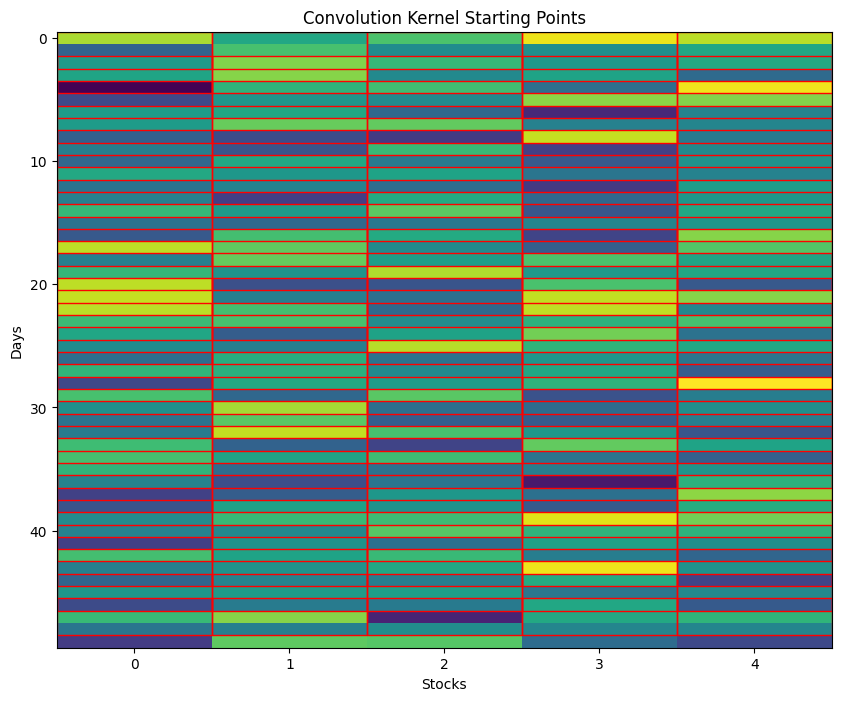

In [15]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Simulating a (50,5) matrix of stock returns
np.random.seed(0)
returns = np.random.randn(50, 5)

# Plotting the returns matrix
fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(returns, cmap='viridis', aspect='auto')

# Convolution settings
kernel_height, kernel_width = 3, 1  # As per nn.Conv2d
stride_height, stride_width = 2, 1  # As per nn.Conv2d

# Visualizing the kernel application
for i in range(0, returns.shape[0] - kernel_height + 1, stride_height):
    for j in range(0, returns.shape[1] - kernel_width + 1, stride_width):
        # Draw a rectangle for the kernel's current position
        rect = patches.Rectangle((j-0.5, i-0.5), kernel_width, kernel_height, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

ax.set_title('Convolution Kernel Starting Points')
ax.set_xlabel('Stocks')
ax.set_ylabel('Days')
plt.show()
